# Assignment 3

**Due date: Monday 10/18, end of day**

This assignment will contain two parts:

1. Exploring evictions and code violations in Philadelphia
2. Comparing the NDVI in Philadelphia

## Part 1: Exploring Evictions and Code Violations in Philadelphia

In this assignment, we'll explore spatial trends evictions in Philadelphia using data from the [Eviction Lab](https://evictionlab.org/) and building code violations using data from [OpenDataPhilly](https://www.opendataphilly.org/).

We'll be exploring the idea that evictions can occur as retaliation against renters for reporting code violations. Spatial correlations between evictions and code violations from the City's Licenses and Inspections department can offer some insight into this question. 

**A couple of interesting background readings:**
- [HuffPost article](https://www.huffingtonpost.com/entry/cities-are-starting-to-pay-attention-to-the-eviction-crisis-thats-devastated-poor-tenants_us_5b1a7b21e4b0bbb7a0dbd59e)
- [PlanPhilly article](http://planphilly.com/articles/2018/04/12/philly-landlords-evict-more-people-than-owners-in-other-large-cities)

## 1.1 Explore Eviction Lab Data

The Eviction Lab built the first national database for evictions. If you aren't familiar with the project, you can explore their website: https://evictionlab.org/ 

### 1.1.1 Read data using `geopandas`

The first step is to read the eviction data by census tract using `geopandas`. The data for all of Pennsylvania by census tract is available in the `data/` folder in a GeoJSON format.

Load the data file "PA-tracts.geojson" using `geopandas`

**Note:** If you'd like to see all columns in the data frame, you can increase the max number of columns using pandas display options:

In [1]:
import pandas as pd
import geopandas as gpd
import hvplot.pandas
import numpy as np

In [2]:
pd.options.display.max_columns = 999

In [3]:
tracts = gpd.read_file("./data/PA-tracts.geojson")

### 1.1.2 Explore and trim the data 

We will need to trim data to Philadelphia only. Take a look at the data dictionary for the descriptions of the various columns in top-level repository folder: `eviction_lab_data_dictionary.txt`

**Note:** the column names are shortened — see the end of the above file for the abbreviations. The numbers at the end of the columns indicate the years. For example, `e-16` is the number of evictions in 2016. 

Take a look at the individual columns and trim to census tracts in Philadelphia. (Hint: Philadelphia is both a city and a county).

In [4]:
tracts.head()

GEOID     west    south     east    north        n  \
0  42003412002 -80.1243  40.5422 -80.0640  40.5890  4120.02   
1  42003413100 -80.0681  40.5850 -79.9906  40.6143     4131   
2  42003413300 -80.0657  40.5527 -80.0210  40.5721     4133   
3  42003416000 -79.8113  40.5440 -79.7637  40.5630     4160   
4  42003417200 -79.7948  40.5341 -79.7642  40.5443     4172   

                               pl     p-00  pr-00  roh-00  pro-00  mgr-00  \
0  Allegheny County, Pennsylvania  4748.59   0.88    58.0    3.66  949.31   
1  Allegheny County, Pennsylvania  6771.01   3.47   729.0   28.75  674.10   
2  Allegheny County, Pennsylvania  5044.59   2.99   119.0    6.68  938.08   
3  Allegheny County, Pennsylvania  1775.93   4.99   121.0   15.30  557.90   
4  Allegheny County, Pennsylvania  1428.03  11.95   321.0   48.27  409.00   

     mhi-00     mpv-00  rb-00  pw-00  paa-00  ph-00  pai-00  pa-00  pnp-00  \
0  89226.06  195358.33  22.82  94.89    0.84   0.43    0.06   2.83    0.33   
1  75492.65  193726.88  21.39  91.61    1.81   0.94    0.03   4.85    0.01   
2  60019.14  131521.90  28.36  97.15    0.37   0.49    0.12   1.61    0.00   
3  39073.61   77316.48  17.60  99.50    0.06   0.11    0.00   0.00    0.00   
4  34306.14   66400.38  22.10  98.46    0.63   0.28    0.07   0.07    0.00   

   pm-00  po-00  ef-00  e-00  er-00  efr-00  lf-00  imputed-00  subbed-00  \
0   0.62   0.00    1.0   1.0   1.73    1.73    0.0         0.0        0.0   
1   0.66   0.07   10.0   4.0   0.55    1.37    0.0         0.0        0.0   
2   0.26   0.00    2.0   1.0   0.84    1.68    0.0         0.0        0.0   
3   0.33   0.00    1.0   1.0   0.83    0.83    0.0         0.0        0.0   
4   0.35   0.14    9.0   7.0   2.18    2.80    0.0         0.0        0.0   

      p-01  pr-01  roh-01  pro-01  mgr-01    mhi-01     mpv-01  rb-01  pw-01  \
0  4748.59   0.88    59.0    3.66  949.31  89226.06  195358.33  22.82  94.89   
1  6771.01   3.47   724.0   28.75  674.10  75492.65  193726.88  21.39  91.61   
2  5044.59   2.99   125.0    6.68  938.08  60019.14  131521.90  28.36  97.15   
3  1775.93   4.99   123.0   15.30  557.90  39073.61   77316.48  17.60  99.50   
4  1428.03  11.95   322.0   48.27  409.00  34306.14   66400.38  22.10  98.46   

   paa-01  ph-01  pai-01  pa-01  pnp-01  pm-01  po-01  ef-01  e-01  er-01  \
0    0.84   0.43    0.06   2.83    0.33   0.62   0.00    0.0   0.0   0.00   
1    1.81   0.94    0.03   4.85    0.01   0.66   0.07   16.0  11.0   1.52   
2    0.37   0.49    0.12   1.61    0.00   0.26   0.00    2.0   2.0   1.60   
3    0.06   0.11    0.00   0.00    0.00   0.33   0.00    3.0   3.0   2.44   
4    0.63   0.28    0.07   0.07    0.00   0.35   0.14   12.0   4.0   1.24   

   efr-01  lf-01  imputed-01  subbed-01     p-02  pr-02  roh-02  pro-02  \
0    0.00    0.0         0.0        0.0  4748.59   0.88    60.0    3.66   
1    2.21    0.0         0.0        0.0  6771.01   3.47   719.0   28.75   
2    1.60    0.0         0.0        0.0  5044.59   2.99   131.0    6.68   
3    2.44    0.0         0.0        0.0  1775.93   4.99   125.0   15.30   
4    3.73    0.0         0.0        0.0  1428.03  11.95   323.0   48.27   

   mgr-02    mhi-02     mpv-02  rb-02  pw-02  paa-02  ph-02  pai-02  pa-02  \
0  949.31  89226.06  195358.33  22.82  94.89    0.84   0.43    0.06   2.83   
1  674.10  75492.65  193726.88  21.39  91.61    1.81   0.94    0.03   4.85   
2  938.08  60019.14  131521.90  28.36  97.15    0.37   0.49    0.12   1.61   
3  557.90  39073.61   77316.48  17.60  99.50    0.06   0.11    0.00   0.00   
4  409.00  34306.14   66400.38  22.10  98.46    0.63   0.28    0.07   0.07   

   pnp-02  pm-02  po-02  ef-02  e-02  er-02  efr-02  lf-02  imputed-02  \
0    0.33   0.62   0.00    3.0   0.0   0.00    4.99    0.0         0.0   
1    0.01   0.66   0.07   22.0  17.0   2.37    3.06    0.0         0.0   
2    0.00   0.26   0.00    0.0   0.0   0.00    0.00    0.0         0.0   
3    0.00   0.33   0.00    3.0   3.0   2.41    2.41    0.0         0.0   
4

In [5]:
tracts = tracts[tracts["pl"] == "Philadelphia County, Pennsylvania"]

### 1.1.3 Transform from wide to tidy format

For this assignment, we are interested in the number of evictions by census tract for various years. Right now, each year has it's own column, so it will be easiest to transform to a tidy format. 

Use the `pd.melt()` function to transform the eviction data into tidy format, using the number of evictions from **2003 to 2016**.

The tidy data frame should have four columns: `GEOID`, `geometry`, a column holding the number of evictions, and a column telling you what the name of the original column was for that value.

**Hints:**
- You'll want to specify the `GEOID` and `geometry` columns as the `id_vars`. This will keep track of the census tract information. 
- You should specify the names of the columns holding the number of evictions as the `value_vars`.
- You can generate a list of this column names using [Python's string formatting]:(https://docs.python.org/3.7/library/string.html#format-examples)
    ```python
    value_vars = ['e-{:02d}'.format(x) for x in range(3, 17)]
    ```

In [6]:
philly = tracts.melt(id_vars = ["GEOID" ,"geometry"],value_name="NumEviction", var_name="year",value_vars = ['e-{:02d}'.format(x) for x in range(3, 17)])

In [7]:
philly["year"] = philly["year"].apply(lambda x : "20" + x[2:4])

In [8]:
philly.head()

GEOID                                           geometry  year  \
0  42101000100  MULTIPOLYGON (((-75.14161 39.95549, -75.14163 ...  2003   
1  42101000200  MULTIPOLYGON (((-75.15122 39.95686, -75.15167 ...  2003   
2  42101000300  MULTIPOLYGON (((-75.16234 39.95782, -75.16237 ...  2003   
3  42101000801  MULTIPOLYGON (((-75.17732 39.95096, -75.17784 ...  2003   
4  42101000804  MULTIPOLYGON (((-75.17118 39.94778, -75.17102 ...  2003   

   NumEviction  
0         21.0  
1          3.0  
2         17.0  
3         13.0  
4         21.0

### 1.1.4 Plot the total number of evictions per year from 2003 to 2016

Use `hvplot` to plot the total number of evictions from 2003 to 2016. You will first need to perform a group by operation and sum up the total number of evictions for all census tracts, and then use `hvplot()` to make your plot.

You can use any type of `hvplot` chart you'd like to show the trend in number of evictions over time.

In [9]:
num_by_year = philly.groupby("year").sum("NumEviction")

In [10]:
num_by_year.head()

NumEviction
year             
2003      10647.0
2004      10491.0
2005      10550.0
2006      11078.0
2007      11032.0

In [11]:
num_by_year.hvplot(kind='bar', rot=90, width=1000)

:Bars   [year]   (NumEviction)

### 1.1.5 The number of evictions across Philadelphia

Our tidy data frame is still a GeoDataFrame with a geometry column, so we can visualize the number of evictions for all census tracts. 

Use `hvplot()` to generate a choropleth showing the number of evictions for a specified year, with a widget dropdown to select a given year (or variable name, e.g., `e-16`, `e-15`, etc). 

**Hints** 
- You'll need to use the `groupby` keyword to tell `hvplot` to make a series of maps, with a widget to select between them.
- You will need to specify `dynamic=False` as a keyword argument to the `hvplot()` function. 
- Be sure to specify a `width` and `height` that makes your output map (roughly) square to limit distortions

In [12]:
import geoviews as gv
import geoviews.tile_sources as gvts

In [13]:

%%opts WMTS [width=800, height=800, xaxis=None, yaxis=None]

choro = philly.hvplot(c='NumEviction', 
                        width=500, 
                        height=400, 
                        alpha=0.5, 
                        groupby="year",
                        geo=True, 
                        cmap='viridis', 
                        hover_cols=['GEOID'])
gvts.ESRI * choro


:DynamicMap   [year]
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .Polygons.I :Polygons   [Longitude,Latitude]   (NumEviction,GEOID)

## 1.2 Code Violations in Philadelphia

Next, we'll explore data for code violations from the Licenses and Inspections Department of Philadelphia to look for potential correlations with the number of evictions.


### 1.2.1 Load data from 2012 to 2016

L+I violation data for years including 2012 through 2016 (inclusive) is provided in a CSV format in the "data/" folder. 

Load the data using pandas and convert to a GeoDataFrame.

In [14]:
vio = pd.read_csv("./data/li_violations.csv")

In [15]:
vio['Coordinates'] = gpd.points_from_xy(vio['lng'], vio['lat'])

In [16]:
vio = gpd.GeoDataFrame(vio, 
                            geometry="Coordinates", 
                            crs="EPSG:4326")

### 1.2.2 Trim to specific violation types

There are many different types of code violations (running the `nunique()` function on the `violationdescription` column will extract all of the unique ones). More information on different types of violations can be found [on the City's website](https://www.phila.gov/li/codesandregulations/Pages/codes.aspx).

Below, I've selected 15 types of violations that deal with property maintenance and licensing issues. We'll focus on these violations. The goal is to see if these kinds of violations are correlated spatially with the number of evictions in a given area. 

Use the list of violations given to trim your data set to only include these types.

In [17]:
violation_types = [
    "INT-PLMBG MAINT FIXTURES-RES",
    "INT S-CEILING REPAIR/MAINT SAN",
    "PLUMBING SYSTEMS-GENERAL",
    "CO DETECTOR NEEDED",
    "INTERIOR SURFACES",
    "EXT S-ROOF REPAIR",
    "ELEC-RECEPTABLE DEFECTIVE-RES",
    "INT S-FLOOR REPAIR",
    "DRAINAGE-MAIN DRAIN REPAIR-RES",
    "DRAINAGE-DOWNSPOUT REPR/REPLC",
    "LIGHT FIXTURE DEFECTIVE-RES",
    "LICENSE-RES SFD/2FD",
    "ELECTRICAL -HAZARD",
    "VACANT PROPERTIES-GENERAL",
    "INT-PLMBG FIXTURES-RES",
]

In [18]:
vio = vio[vio["violationdescription"].isin(violation_types)]

In [19]:
# check the trimming
vio["violationdescription"].isin(violation_types).unique() 

array([ True])

### 1.2.3 Make a hex bin map

The code violation data is **point data**. We can get a quick look at the geographic distribution using `matplotlib` and the `hexbin()` function. Make a hex bin map of the code violations and overlay the census tract outlines. 

**Hints**:
- The eviction data from part 1 was by census tract, so the census tract geometries are available as part of that GeoDataFrame. You can use it to overlay the census tracts on your hex bin map.
- Make sure you convert your GeoDataFrame to a CRS that's better for visualization than plain old 4326.

In [20]:
from matplotlib import pyplot as plt

In [21]:
vio_1 = vio.to_crs("EPSG:3857")

In [22]:
philly_1 = philly.to_crs("EPSG:3857")

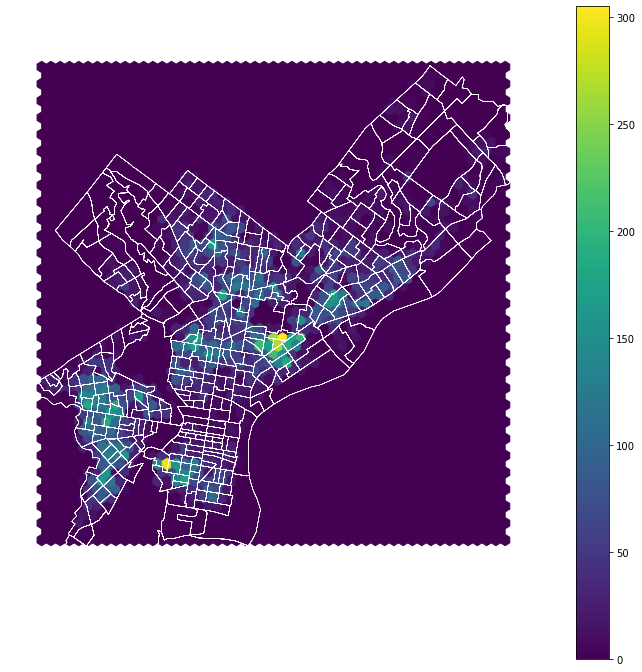

In [23]:
# create the axes
fig, ax = plt.subplots(figsize=(12, 12))


# Extract out the x/y coordindates of the Point objects
xcoords = vio_1.geometry.x
ycoords = vio_1.geometry.y

# Plot a hexbin chart
hex_vals = ax.hexbin(xcoords, ycoords, gridsize=50)

# Add the zillow geometry boundaries
philly_1.plot(ax=ax, facecolor="none", edgecolor="white", linewidth=0.25)


# add a colorbar and format
fig.colorbar(hex_vals, ax=ax)
ax.set_axis_off()
ax.set_aspect("equal")

### 1.2.4 Spatially join data sets

To do a census tract comparison to our eviction data, we need to find which census tract each of the code violations falls into. Use the `geopandas.sjoin()` function to do just that. 


**Hints**
- You can re-use your eviction data frame, but you will only need the `geometry` column (specifying census tract polygons) and the `GEOID` column (specifying the name of each census tract).
- Make sure both data frames have the same CRS before joining them together!

In [24]:
from matplotlib import pyplot as plt

In [25]:
data = gpd.sjoin(vio_1, philly_1[["geometry","GEOID"]], op='within', how='left')

In [26]:
data

lat        lng violationdescription  \
2       40.050593 -75.126578  LICENSE-RES SFD/2FD   
2       40.050593 -75.126578  LICENSE-RES SFD/2FD   
2       40.050593 -75.126578  LICENSE-RES SFD/2FD   
2       40.050593 -75.126578  LICENSE-RES SFD/2FD   
2       40.050593 -75.126578  LICENSE-RES SFD/2FD   
...           ...        ...                  ...   
434046  40.012805 -75.155963   ELECTRICAL -HAZARD   
434046  40.012805 -75.155963   ELECTRICAL -HAZARD   
434046  40.012805 -75.155963   ELECTRICAL -HAZARD   
434046  40.012805 -75.155963   ELECTRICAL -HAZARD   
434046  40.012805 -75.155963   ELECTRICAL -HAZARD   

                             Coordinates  index_right        GEOID  
2       POINT (-8363052.408 4873297.042)          364  42101027100  
2       POINT (-8363052.408 4873297.042)          748  42101027100  
2       POINT (-8363052.408 4873297.042)         1132  42101027100  
2       POINT (-8363052.408 4873297.042)         1516  42101027100  
2       POINT (-8363052.408 4873297.042)         1900  42101027100  
...                                  ...          ...          ...  
434046  POINT (-8366323.531 4867803.242)         3721  42101020102  
434046  POINT (-8366323.531 4867803.242)         4105  42101020102  
434046  POINT (-8366323.531 4867803.242)         4489  42101020102  
434046  POINT (-8366323.531 4867803.242)         4873  42101020102  
434046  POINT (-8366323.531 4867803.242)         5257  42101020102  

[477512 rows x 6 columns]

### 1.2.5 Calculate the number of violations by type per census tract

Next, we'll want to find the number of violations (for each kind) per census tract. You should group the data frame by violation type and census tract name.

The result of this step should be a data frame with three columns: `violationdescription`, `GEOID`, and `N`, where `N` is the number of violations of that kind in the specified census tract.

**Optional: to make prettier plots**

Some census tracts won't have any violations, and they won't be included when we do the above calculation. However, there is a trick to set the values for those census tracts to be zero. After you calculate the sizes of each violation/census tract group, you can run: 

```python
N = N.unstack(fill_value=0).stack().reset_index(name='N')
```
where `N` gives the total size of each of the groups, specified by violation type and census tract name.

See [this StackOverflow post](https://stackoverflow.com/questions/42854801/including-missing-combinations-of-values-in-a-pandas-groupby-aggregation) for more details.

This part is **optional**, but will make the resulting maps a bit prettier.

In [41]:
data_grouped = data.groupby(["violationdescription","GEOID"]).count().iloc[:,1]
data_grouped

violationdescription       GEOID      
CO DETECTOR NEEDED         42101000401    14
                           42101000402    14
                           42101000700    14
                           42101000803    14
                           42101000804    14
                                          ..
VACANT PROPERTIES-GENERAL  42101036501    14
                           42101037900    14
                           42101038000    14
                           42101038200    28
                           42101038300    42
Name: lng, Length: 4000, dtype: int64

In [42]:
N = data_grouped.unstack(fill_value=0).stack().reset_index(name='N')
N

violationdescription        GEOID   N
0            CO DETECTOR NEEDED  42101000100   0
1            CO DETECTOR NEEDED  42101000200   0
2            CO DETECTOR NEEDED  42101000300   0
3            CO DETECTOR NEEDED  42101000401  14
4            CO DETECTOR NEEDED  42101000402  14
...                         ...          ...  ..
5530  VACANT PROPERTIES-GENERAL  42101980100   0
5531  VACANT PROPERTIES-GENERAL  42101980500   0
5532  VACANT PROPERTIES-GENERAL  42101980700   0
5533  VACANT PROPERTIES-GENERAL  42101980800   0
5534  VACANT PROPERTIES-GENERAL  42101989100   0

[5535 rows x 3 columns]

### 1.2.6 Merge with census tracts geometries

We now have the number of violations of different types per census tract specified as a regular DataFrame. You can now merge it with the census tract geometries (from your eviction data GeoDataFrame) to create a GeoDataFrame. 

**Hints**
- Use `pandas.merge()` and specify the `on` keyword to be the column holding census tract names. 
- Make sure the result of the merge operation is a GeoDataFrame — you will want the GeoDataFrame holding census tract geometries to be the first argument of the `pandas.merge()` function.

In [48]:
philly_1

GEOID                                           geometry  year  \
0     42101000100  MULTIPOLYGON (((-8364725.429 4859476.459, -836...  2003   
1     42101000200  MULTIPOLYGON (((-8365795.877 4859675.562, -836...  2003   
2     42101000300  MULTIPOLYGON (((-8367033.304 4859815.415, -836...  2003   
3     42101000801  MULTIPOLYGON (((-8368701.316 4858819.058, -836...  2003   
4     42101000804  MULTIPOLYGON (((-8368017.480 4858357.291, -836...  2003   
...           ...                                                ...   ...   
5371  42101017800  MULTIPOLYGON (((-8361583.993 4865432.665, -836...  2016   
5372  42101017900  MULTIPOLYGON (((-8360752.213 4864204.001, -836...  2016   
5373  42101018002  MULTIPOLYGON (((-8360657.480 4864063.941, -836...  2016   
5374  42101018300  MULTIPOLYGON (((-8356288.265 4863950.110, -835...  2016   
5375  42101018400  MULTIPOLYGON (((-8355531.552 4864854.203, -835...  2016   

      NumEviction  
0            21.0  
1             3.0  
2            17.0  
3            13.0  
4            21.0  
...           ...  
5371        104.0  
5372         80.0  
5373         32.0  
5374          7.0  
5375          2.0  

[5376 rows x 4 columns]

In [49]:
N['GEOID

violationdescription        GEOID   N
0            CO DETECTOR NEEDED  42101000100   0
1            CO DETECTOR NEEDED  42101000200   0
2            CO DETECTOR NEEDED  42101000300   0
3            CO DETECTOR NEEDED  42101000401  14
4            CO DETECTOR NEEDED  42101000402  14
...                         ...          ...  ..
5530  VACANT PROPERTIES-GENERAL  42101980100   0
5531  VACANT PROPERTIES-GENERAL  42101980500   0
5532  VACANT PROPERTIES-GENERAL  42101980700   0
5533  VACANT PROPERTIES-GENERAL  42101980800   0
5534  VACANT PROPERTIES-GENERAL  42101989100   0

[5535 rows x 3 columns]

In [ ]:
merged = pd.merge(philly_1,N,on="GEOID", how = "left",validate='one_to_many')
merged = merged[["GEOID","geometry","violationdescription","N"]]
merged

### 1.2.7 Interactive choropleths for each violation type

Now, we can use `hvplot()` to create an interactive choropleth for each violation type and add a widget to specify different violation types. 

**Hints** 
- You'll need to use the `groupby` keyword to tell `hvplot` to make a series of maps, with a widget to select different violation types.
- You will need to specify `dynamic=False` as a keyword argument to the `hvplot()` function. 
- Be sure to specify a `width` and `height` that makes your output map (roughly) square to limit distortions

In [46]:

%%opts WMTS [width=800, height=800, xaxis=None, yaxis=None]

choro_2 = merged.hvplot(c='N', 
                        width=500, 
                        height=400, 
                        alpha=0.5, 
                        groupby='violationdescription',
                        geo=True, 
                        cmap='viridis',
                        dynamic=False
                       )
gvts.ESRI * choro_2


AttributeError: 'list' object has no attribute 'xy'

:HoloMap   [violationdescription]
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .Polygons.I :Polygons   [Longitude,Latitude]   (N)

## 1.3. A side-by-side comparison

From the interactive maps of evictions and violations, you should notice a lot of spatial overlap. 

As a final step, we'll make a side-by-side comparison to better show the spatial correlations. This will involve a few steps: 

1. Trim the data frame plotted in section 1.1.5 to only include evictions from 2016. 
2. Trim the data frame plotted in section 1.2.7 to only include a single violation type (pick whichever one you want!).
3. Use `hvplot()` to make two interactive choropleth maps, one for the data from step 1. and one for the data in step 2.
4. Show these two plots side by side (one row and 2 columns) using the syntax for combining charts.

**Note:** since we selected a single year and violation type, you won't need to use the `groupby=` keyword here.

In [31]:
compar_E = philly[philly["year"]== "2016"]
compar_N = merged[merged["violationdescription"]=="DRAINAGE-DOWNSPOUT REPR/REPLC"]

In [32]:
merged

GEOID                                           geometry  \
0      42101000100  MULTIPOLYGON (((-8364725.429 4859476.459, -836...   
14     42101000200  MULTIPOLYGON (((-8365795.877 4859675.562, -836...   
28     42101000300  MULTIPOLYGON (((-8367033.304 4859815.415, -836...   
42     42101000401  MULTIPOLYGON (((-8368195.925 4859492.870, -836...   
56     42101000402  MULTIPOLYGON (((-8368195.925 4859492.870, -836...   
...            ...                                                ...   
77420  42101980100  MULTIPOLYGON (((-8372335.452 4872786.323, -837...   
77434  42101980500  MULTIPOLYGON (((-8364723.425 4868966.938, -836...   
77448  42101980700  MULTIPOLYGON (((-8364028.478 4855669.180, -836...   
77462  42101980800  MULTIPOLYGON (((-8378127.071 4862687.416, -837...   
77476  42101989100  MULTIPOLYGON (((-8349842.792 4869301.276, -835...   

            violationdescription   N  
0             CO DETECTOR NEEDED   0  
14            CO DETECTOR NEEDED   0  
28            CO DETECTOR NEEDED   0  
42            CO DETECTOR NEEDED  14  
56            CO DETECTOR NEEDED  14  
...                          ...  ..  
77420  VACANT PROPERTIES-GENERAL   0  
77434  VACANT PROPERTIES-GENERAL   0  
77448  VACANT PROPERTIES-GENERAL   0  
77462  VACANT PROPERTIES-GENERAL   0  
77476  VACANT PROPERTIES-GENERAL   0  

[5535 rows x 4 columns]

In [33]:
choro_3 = compar_E.hvplot(c='NumEviction', 
                        width=300, 
                        height=200, 
                        alpha=0.5, 
                        geo=True, 
                        cmap='viridis'
                       )
choro_4 = compar_N.hvplot(c='N', 
                        width=300, 
                        height=200, 
                        alpha=0.5, 
                        geo=True, 
                        cmap='viridis'
                       )

gvts.ESRI * (choro_3 + choro_4)

:Layout
   .Overlay.I  :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .Polygons.I :Polygons   [Longitude,Latitude]   (NumEviction)
   .Overlay.II :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .Polygons.I :Polygons   [Longitude,Latitude]   (N)

## Part 2: Exploring the NDVI in Philadelphia

In this part, we'll explore the NDVI in Philadelphia a bit more. This part will include two parts:

1. We'll compare the median NDVI within the city limits and the immediate suburbs
1. We'll calculate the  NDVI around street trees in the city.

## 2.1 Comparing the NDVI in the city and the suburbs

### 2.1.1 Load Landsat data for Philadelphia

Use rasterio to load the landsat data for Philadelphia (available in the "data/" folder)

In [34]:
import rasterio as rio
landsat = rio.open("./data/landsat8_philly.tif")
landsat

<open DatasetReader name='./data/landsat8_philly.tif' mode='r'>

### 2.1.2 Separating the city from the suburbs

Create two polygon objects, one for the city limits and one for the suburbs. To calculate the suburbs polygon, we will take everything outside the city limits but still within the bounding box. 

* The city limits are available in the "data/" folder.
* To calculate the suburbs polygon, the "envelope" attribute of the city limits geometry will be useful.
* You can use geopandas' [geometric manipulation](http://geopandas.org/geometric_manipulations.html#examples-of-geometric-manipulations) functionality to calculate the suburbs polygon from the city limits polygon and the envelope polygon.

In [35]:
city_limits = gpd.read_file("./data/City_Limits.geojson")

In [36]:
city_limits = city_limits.to_crs(landsat.crs.data['init'])

In [37]:
suburbs = city_limits.envelope.difference(city_limits)

### 2.1.3 Mask and calculate the NDVI for the city and the suburbs

Using the two polygons from the last section, use rasterio's mask functionality to create two masked arrays from the landsat data, one for the city and one for the suburbs. 

For each masked array, calculate the NDVI.

In [38]:
from rasterio.mask import mask

In [39]:
city_masked, mask_transform = mask(
    dataset=landsat,
    shapes=city_limits.geometry,
    crop=True,  # remove pixels not within boundary
    all_touched=True,  # get all pixels that touch the boudnary
    filled=False,  # do not fill cropped pixels with a default value
)

sub_masked, mask_transform = mask(
    dataset=landsat,
    shapes=suburbs.geometry,
    crop=True,  # remove pixels not within boundary
    all_touched=True,  # get all pixels that touch the boudnary
    filled=False,  # do not fill cropped pixels with a default value
)


NameError: name 'landsat_extent' is not defined

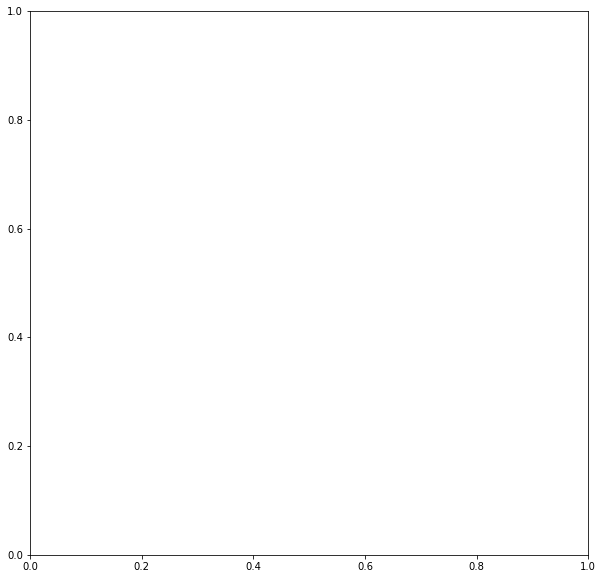

In [40]:
# check the suburbs
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the first band
ax.imshow(sub_masked[0], cmap="viridis", extent=landsat_extent)

# Format and add the city limits
city_limits.boundary.plot(ax=ax, color="gray", linewidth=4)
ax.set_axis_off()

In [ ]:
def calculate_NDVI(nir, red):
    """
    Calculate the NDVI from the NIR and red landsat bands
    """
    
    # Convert to floats
    nir = nir.astype(float)
    red = red.astype(float)
    
    # Get valid entries
    check = np.logical_and( red.mask == False, nir.mask == False )
    
    # Where the check is True, return the NDVI, else return NaN
    ndvi = np.where(check,  (nir - red ) / ( nir + red ), np.nan )
    return ndvi 

In [ ]:
city_NDVI = calculate_NDVI(city_masked[3], city_masked[4])
sub_NDVI = calculate_NDVI(sub_masked[3], sub_masked[4])

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

# Plot NDVI
img = ax.imshow(sub_NDVI, extent=landsat_extent)

# Format and plot city limits
city_limits.plot(ax=ax, edgecolor='gray', facecolor='none', linewidth=4)
plt.colorbar(img)
ax.set_axis_off()
ax.set_title("NDVI outside Philadelphia", fontsize=18);

### 2.1.4 Calculate the median NDVI within the city and within the suburbs

* Calculate the median value from your NDVI arrays for the city and suburbs
* Numpy's `nanmedian` function will be useful for ignoring NaN elements
* Print out the median values. Which has a higher NDVI: the city or suburbs?

## 2.2 Calculating the NDVI for Philadelphia's street treets

### 2.2.1 Load the street tree data

The data is available in the "data/" folder. It has been downloaded from [OpenDataPhilly](https://www.opendataphilly.org/dataset/ppr-tree-canopy). It contains the locations of abot 2,500 street trees in Philadelphia.

### 2.2.2 Calculate the NDVI values at the locations of the street trees

* Use the rasterstats package to calculate the NDVI values at the locations of the street trees.
* Since these are point geometries, you can calculate either the median or the mean statistic (only one pixel will contain each point).

### 2.2.3 Plotting the results

Make two plots of the results:

1. A histogram of the NDVI values, using matplotlib's `hist` function. Include a vertical line that marks the NDVI = 0 threshold
1. A plot of the street tree points, colored by the NDVI value, using geopandas' `plot` function. Include the city limits boundary on your plot.

The figures should be clear and well-styled, with for example, labels for axes, legends, and clear color choices. 